# Salsabila Putri Jatiningtyas
# 1301170106

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [2]:
%matplotlib inline

In [3]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [4]:
state_pop = pd.read_csv("data/nst-est2018-alldata.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.478565,1.350094,2.689358,3.226360,3.343874,4.148127,5.127995,5.372314,4.164981,3.965769


In [5]:
pop_states = usa.merge(state_pop, left_on="NAME", right_on="NAME")
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",...,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",...,-1.278002,-0.916222,1.843768,-0.120479,2.359797,1.925327,0.702299,0.036461,0.573348,0.934001
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",...,4.689728,7.127976,4.801565,4.910826,6.209397,6.493793,6.755571,5.516683,6.460703,9.019623
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",...,-0.698138,-1.040184,-1.999325,-1.820990,0.365060,-0.030544,-0.494039,-0.313424,0.968963,0.716636
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",...,-2.144836,-1.598828,1.516750,0.547598,-0.023724,-0.133225,-0.921843,-0.952470,0.302260,1.165270


<AxesSubplot:>

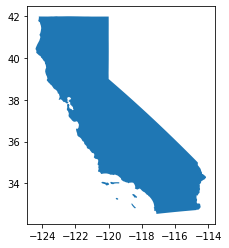

In [6]:
pop_states[pop_states.NAME=="California"].plot()

In [7]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

<AxesSubplot:>

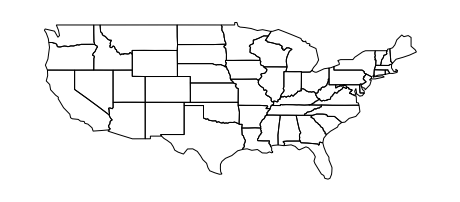

In [8]:
gplt.polyplot(contiguous_usa)

In [9]:
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)

<AxesSubplot:>

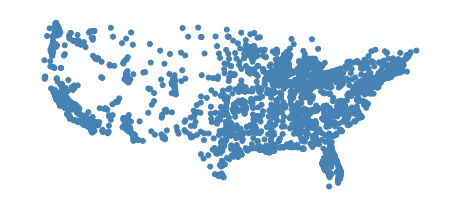

In [10]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

<AxesSubplot:>

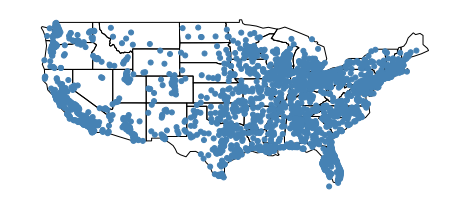

In [11]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

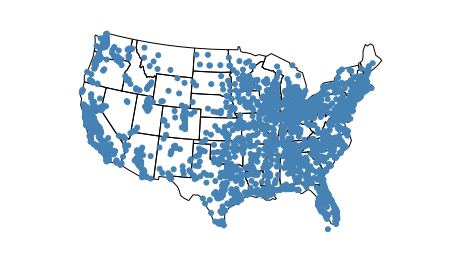

In [12]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

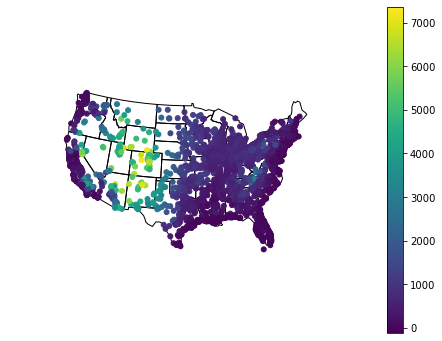

In [13]:
#Representing Data

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
  continental_usa_cities,
  ax=ax,
  hue="ELEV_IN_FT",
  legend=True
)

Text(0.5, 1.0, 'Cities in the continental US, by elevation')

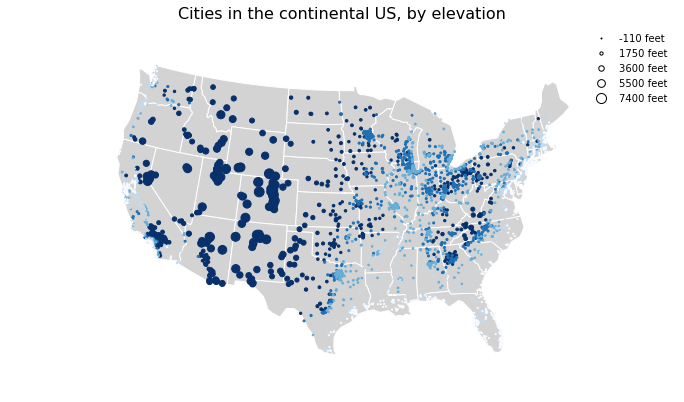

In [14]:
ax = gplt.polyplot(
  contiguous_usa,
  edgecolor="white",
  facecolor="lightgray",
  figsize=(12, 8),
  projection=gcrs.AlbersEqualArea()
)

gplt.pointplot(
  continental_usa_cities,
  ax=ax,
  hue="ELEV_IN_FT",
  cmap="Blues",
  scheme="quantiles",
  scale="ELEV_IN_FT",
  limits=(1, 10),
  legend=True,
  legend_var="scale",
  legend_kwargs={"frameon": False},
  legend_values=[-110, 1750, 3600, 5500, 7400],
  legend_labels=["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
)

ax.set_title("Cities in the continental US, by elevation", fontsize=16)

<GeoAxesSubplot:>

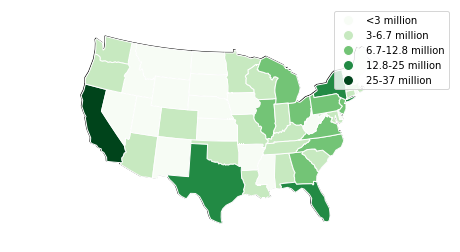

In [15]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  contiguous_usa,
  hue="population",
  edgecolor="white",
  linewidth=1,
  cmap="Greens",
  legend=True,
  scheme="FisherJenks",
  legend_labels=[
    "<3 million", "3-6.7 million", "6.7-12.8 million",
    "12.8-25 million", "25-37 million"
  ],
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

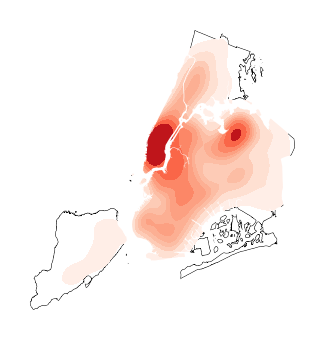

In [16]:
boroughs = gpd.read_file(gplt.datasets.get_path("nyc_boroughs"))
collisions = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))
ax = gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
gplt.kdeplot(collisions, cmap="Reds", shade=True, clip=boroughs, ax=ax)

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

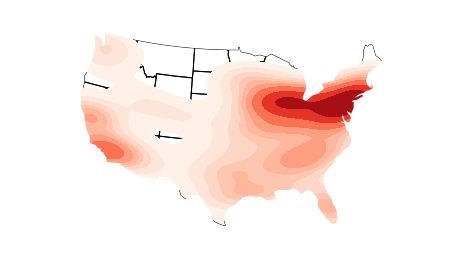

In [17]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.kdeplot(
  continental_usa_cities, 
  cmap="Reds", 
  shade=True, 
  clip=contiguous_usa, 
  ax=ax
)

In [18]:
obesity = pd.read_csv(gplt.datasets.get_path("obesity_by_state"), sep="\t")
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


In [19]:
geo_obesity = contiguous_usa.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


<GeoAxesSubplot:>

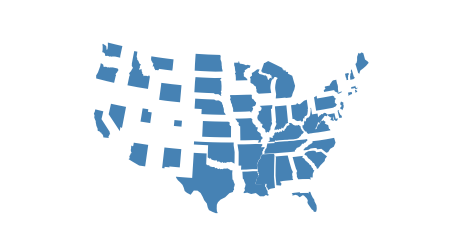

In [20]:
gplt.cartogram(
    geo_obesity,
    scale="Percent",
    projection=gcrs.AlbersEqualArea()
)

In [21]:
scheme = mc.Quantiles(continental_usa_cities["ELEV_IN_FT"], k=10)

<GeoAxesSubplot:>

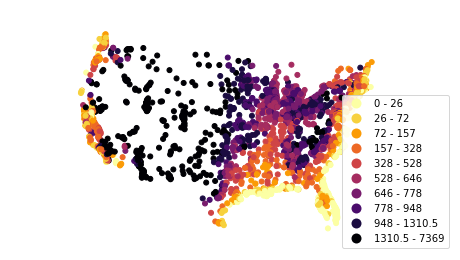

In [22]:
gplt.pointplot(
  continental_usa_cities,
  projection=gcrs.AlbersEqualArea(),
  hue="ELEV_IN_FT",
  scheme=scheme,
  cmap="inferno_r",
  legend=True
)

In [23]:
import warnings
warnings.filterwarnings("ignore", "GeoSeries.isna", UserWarning)

C:\Users\ASUS\miniconda3\lib\site-packages\geopandas\geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


Text(0.5, 1.0, 'Primary Schools in Greater Melbourne, 2018')

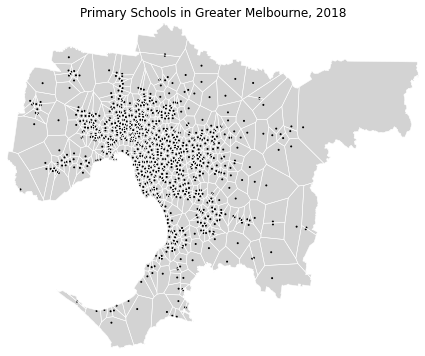

In [24]:
melbourne = gpd.read_file(gplt.datasets.get_path("melbourne"))
df = gpd.read_file(gplt.datasets.get_path("melbourne_schools"))
melbourne_primary_schools = df.query('School_Type == "Primary"')

ax = gplt.voronoi(
  melbourne_primary_schools,
  clip=melbourne,
  linewidth=0.5,
  edgecolor="white",
  projection=gcrs.Mercator()
)

gplt.polyplot(
  melbourne,
  edgecolor="None",
  facecolor="lightgray",
  ax=ax
)

gplt.pointplot(
  melbourne_primary_schools,
  color="black",
  ax=ax,
  s=1,
  extent=melbourne.total_bounds
)

plt.title("Primary Schools in Greater Melbourne, 2018")

ValueError: The input data contains duplicate coordinates, which Voronoi tessellation does not support. To fix this error, make sure that ever record in your dataset has a unique coordinate value.

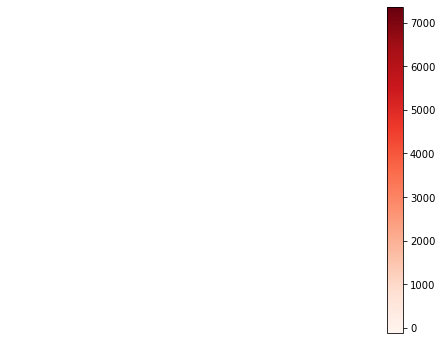

In [25]:
proj = gplt.crs.AlbersEqualArea(
  central_longitude=-98,
  central_latitude=39.5
)

ax = gplt.voronoi(
  continental_usa_cities,
  hue="ELEV_IN_FT",
  clip=contiguous_usa,
  projection=proj,
  cmap="Reds",
  legend=True,
  edgecolor="white",
  linewidth=0.01
)

gplt.polyplot(
  contiguous_usa,
  ax=ax,
  extent=contiguous_usa.total_bounds,
  edgecolor="black",
  linewidth=1,
  zorder=1
)

# Visualisasi Data COVID-19

In [26]:
ihme = pd.read_csv("data/Hospitalization_all_locs2.csv")
ihme.head()

,location_id,date,V1,location_name,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,...,est_infections_mean_p100k_rate,est_infections_lower_p100k_rate,est_infections_upper_p100k_rate,inf_cuml_mean,inf_cuml_upper,inf_cuml_lower,seroprev_mean,seroprev_upper,seroprev_lower,seroprev_data_type
0,1,2020-02-04,48609,Global,14282.965745,14282.965745,14282.965745,5827.528414,5827.528414,5827.528414,...,0.257229,0.216345,0.307828,19902.994791,23818.103526,16739.591236,0.000033,0.000044,0.000025,projected
1,1,2020-02-05,48610,Global,15571.172555,15571.172555,15571.172555,6217.948134,6217.948134,6217.948134,...,0.248723,0.209659,0.296248,39147.827127,46740.162911,32961.883825,0.000037,0.000047,0.000028,projected
2,1,2020-02-06,48611,Global,16762.153085,16762.153085,16762.153085,6559.103608,6559.103608,6559.103608,...,0.240485,0.203118,0.284973,57755.264357,68789.859538,48678.063794,0.000040,0.000051,0.000031,projected
3,1,2020-02-07,48612,Global,17837.855078,17837.855078,17837.855078,6845.497859,6845.497859,6845.497859,...,0.232862,0.196742,0.274455,75772.879673,90025.715095,63900.899071,0.000043,0.000054,0.000034,projected
4,1,2020-02-08,48613,Global,18776.755401,18776.755401,18776.755401,7071.639802,7071.639802,7071.639802,...,0.225968,0.192549,0.266491,93257.078589,110645.385308,78799.283919,0.000046,0.000057,0.000037,projected


In [27]:
#filter row (22 April 2020)

is_earthday = ihme["date"]=="2020–02–22"
is_earthday.head()

0    False
1    False
2    False
3    False
4    False
Name: date, dtype: bool

In [37]:
cv19 = contiguous_usa.merge(ihme, left_on="state", right_on="location_name")
cv19.head()

,state,adm1_code,population,geometry,location_id,date,V1,location_name,allbed_mean,allbed_lower,...,est_infections_mean_p100k_rate,est_infections_lower_p100k_rate,est_infections_upper_p100k_rate,inf_cuml_mean,inf_cuml_upper,inf_cuml_lower,seroprev_mean,seroprev_upper,seroprev_lower,seroprev_data_type
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",546,2020-02-04,85457,Minnesota,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,projected
1,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",546,2020-02-05,85458,Minnesota,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,projected
2,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",546,2020-02-06,85459,Minnesota,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,projected
3,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",546,2020-02-07,85460,Minnesota,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,projected
4,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",546,2020-02-08,85461,Minnesota,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,projected


In [41]:
#calculate column for 'death per million'

deaths_per_mil = cv19["deaths_mean"] / cv19["population"] * 1000000.0
cv19["deaths_per_mil"] = deaths_per_mil

Text(0.5, 1.0, 'COVID-19 deaths/million vs. population, on Earth Day 2020')

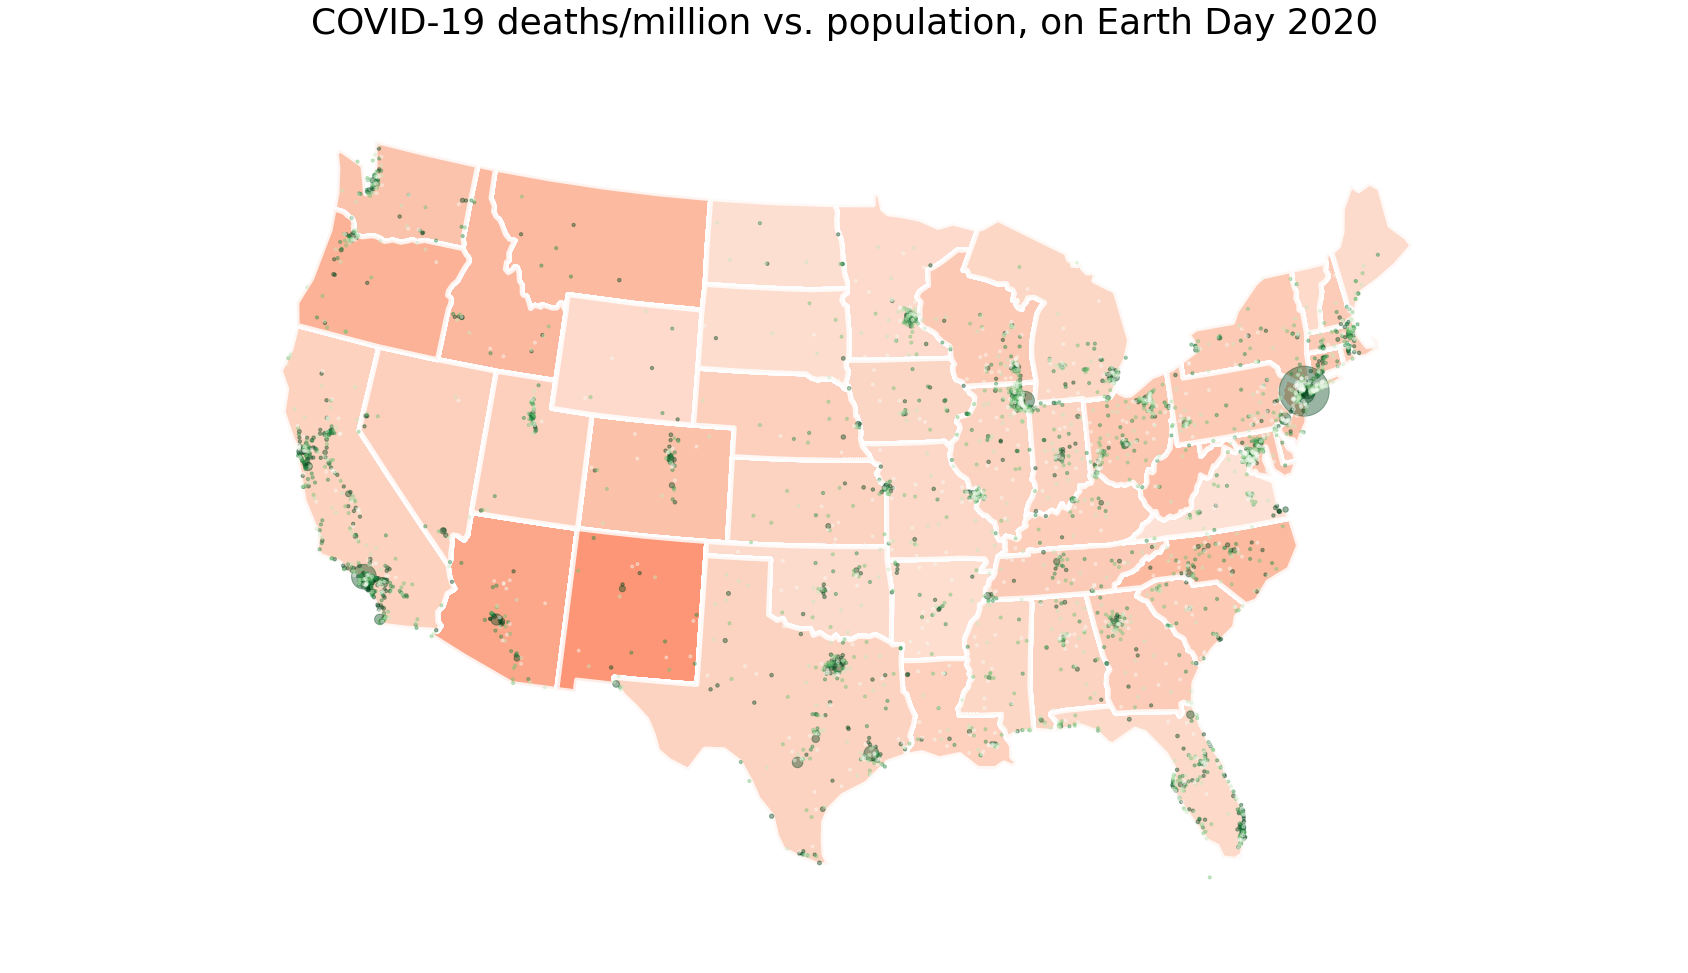

In [39]:
ax = gplt.choropleth(
    cv19,
    hue="deaths_per_mil",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha = 0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
)

ax = gplt.pointplot(
    continental_usa_cities,
    hue="POP_2010",
    cmap="Greens",
    scheme="quantiles",
    scale="POP_2010",
    limits=(3, 50),
    zorder=2, 
    alpha = 0.4,
    ax=ax
)

ax.set_title(
    "COVID-19 deaths/million vs. population, on Earth Day 2020",
    fontsize=36
)

In [42]:
def plot_choropleth (anim_path, date, cv19, cities):
  ax = gplt.choropleth(
    cv19,
    hue="deaths_per_mil",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha=0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
  )
  
  ax = gplt.pointplot(
    cities,
    hue="POP_2010",
    cmap="Greens",
    scheme="quantiles",
    scale="POP_2010",
    limits=(3, 50),
    zorder=2,
    alpha=0.4,
    ax=ax
  )
  
  ax.set_title(
    f"COVID-19 deaths/million vs. population on {date}",
    fontsize=36
  )
  
  file_name = str(anim_path / "{}.png".format(date.replace("-", "")))
  plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
  
  return file_name

In [46]:
date_set = set([])

for d in ihme["date"].tolist():
  if d >= "2020–03–23" and d <= "2020–04–01":
    date_set.add(d)

dates = sorted(list(date_set))

In [47]:
anim_path = pathlib.Path("anim/")
anim_path.mkdir(parents=True, exist_ok=True)

fig = plt.figure()
image_files = []

for date in dates:
  is_earthday = ihme["date"]==date
  cv19 = contiguous_usa.merge(ihme[is_earthday], left_on="state", right_on="location_name")
  
  deaths_per_mil = cv19["deaths_mean"] / cv19["population"] * 1000000.0
  cv19["deaths_per_mil"] = deaths_per_mil
  
  file_name = plot_choropleth(anim_path, date, cv19, continental_usa_cities)
  image_files.append(file_name)

<Figure size 432x288 with 0 Axes>

In [45]:
images = []

for file_name in image_files:
  images.append(imageio.imread(file_name))

gif_path = "movie.gif"
imageio.mimsave(gif_path, images, fps=2)

RuntimeError: Zero images were written.